In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

d = pd.read_csv('./DHS_Daily_Report_2020.csv')
d


,Date,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,28770,21919,50689,7269,2650,9919,10469,14897,21919,1866,3954,0,0,0
1,1/2/2014,28843,21954,50797,7289,2661,9950,10484,14930,21954,1871,3963,0,0,0
2,1/3/2014,28947,22007,50954,7323,2678,10001,10521,14978,22007,1872,3968,0,0,0
3,1/4/2014,28954,22003,50957,7320,2684,10004,10520,14971,22003,1877,3979,0,0,0
4,1/5/2014,28991,21966,50957,7386,2692,10078,10502,14941,21966,1874,3972,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,12/27/2020,35942,17592,53534,13950,4542,18492,10039,13217,17592,30809,2004,4233,0,0
2553,12/28/2020,35844,17505,53349,13908,4557,18465,9986,13143,17505,30648,2006,4236,0,0
2554,12/29/2020,35789,17417,53206,13952,4562,18514,9930,13074,17417,30491,1990,4201,0,0
2555,12/30/2020,35663,17422,53085,13850,4535,18385,9927,13077,17422,30499,1989,4201,0,0


In [24]:
test = pd.DataFrame()
test['ds'] = d['Date']
test['y'] = d['Total Individuals in Shelter']
df = test
df

,ds,y
0,1/1/2014,50689
1,1/2/2014,50797
2,1/3/2014,50954
3,1/4/2014,50957
4,1/5/2014,50957
...,...,...
2552,12/27/2020,53534
2553,12/28/2020,53349
2554,12/29/2020,53206
2555,12/30/2020,53085


<AxesSubplot: >

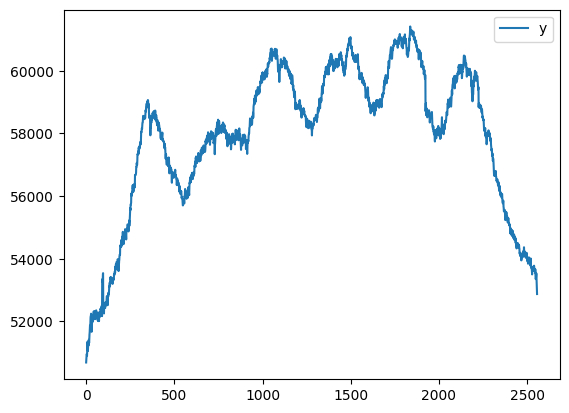

In [25]:
test.plot()

In [26]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast


00:46:05 - cmdstanpy - INFO - Chain [1] start processing
00:46:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,50286.479170,50503.438885,51174.563207,50286.479170,50286.479170,548.217863,548.217863,548.217863,36.140637,36.140637,36.140637,512.077226,512.077226,512.077226,0.0,0.0,0.0,50834.697033
1,2014-01-02,50302.854101,50501.292341,51211.455041,50302.854101,50302.854101,561.946895,561.946895,561.946895,30.099651,30.099651,30.099651,531.847243,531.847243,531.847243,0.0,0.0,0.0,50864.800995
2,2014-01-03,50319.229031,50506.575537,51184.442326,50319.229031,50319.229031,508.984280,508.984280,508.984280,-46.167197,-46.167197,-46.167197,555.151477,555.151477,555.151477,0.0,0.0,0.0,50828.213311
3,2014-01-04,50335.603962,50475.951264,51160.822235,50335.603962,50335.603962,497.151382,497.151382,497.151382,-84.667806,-84.667806,-84.667806,581.819188,581.819188,581.819188,0.0,0.0,0.0,50832.755343
4,2014-01-05,50351.978892,50632.526161,51328.974678,50351.978892,50351.978892,623.004895,623.004895,623.004895,11.393518,11.393518,11.393518,611.611377,611.611377,611.611377,0.0,0.0,0.0,50974.983788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,48250.428628,39502.045317,58529.700448,39087.987114,58049.610066,510.172972,510.172972,510.172972,42.998645,42.998645,42.998645,467.174328,467.174328,467.174328,0.0,0.0,0.0,48760.601600
2918,2021-12-28,48236.109459,39538.083023,58559.997430,39021.597028,58070.125543,479.434704,479.434704,479.434704,10.202551,10.202551,10.202551,469.232153,469.232153,469.232153,0.0,0.0,0.0,48715.544163
2919,2021-12-29,48221.790290,39485.260394,58608.606762,38992.777321,58143.593331,510.740919,510.740919,510.740919,36.140637,36.140637,36.140637,474.600282,474.600282,474.600282,0.0,0.0,0.0,48732.531209
2920,2021-12-30,48207.471120,39386.924442,58758.572692,38927.146433,58193.133177,513.563568,513.563568,513.563568,30.099651,30.099651,30.099651,483.463917,483.463917,483.463917,0.0,0.0,0.0,48721.034689


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

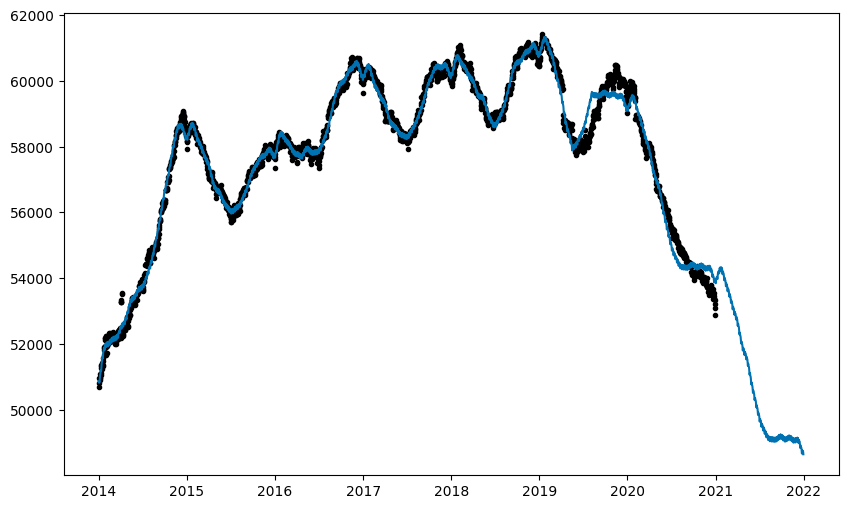

In [30]:
m.plot(forecast)

00:28:18 - cmdstanpy - INFO - Chain [1] start processing
00:28:18 - cmdstanpy - INFO - Chain [1] done processing


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

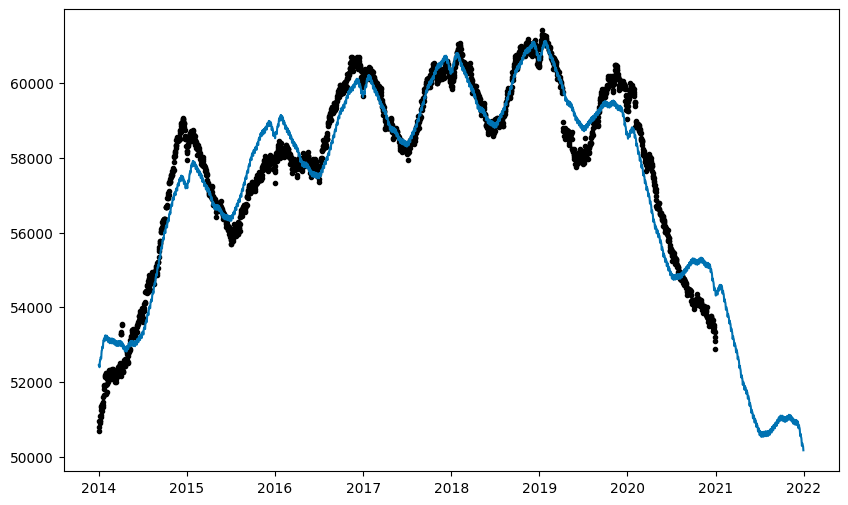

In [14]:
m = Prophet(changepoint_prior_scale=0.001)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

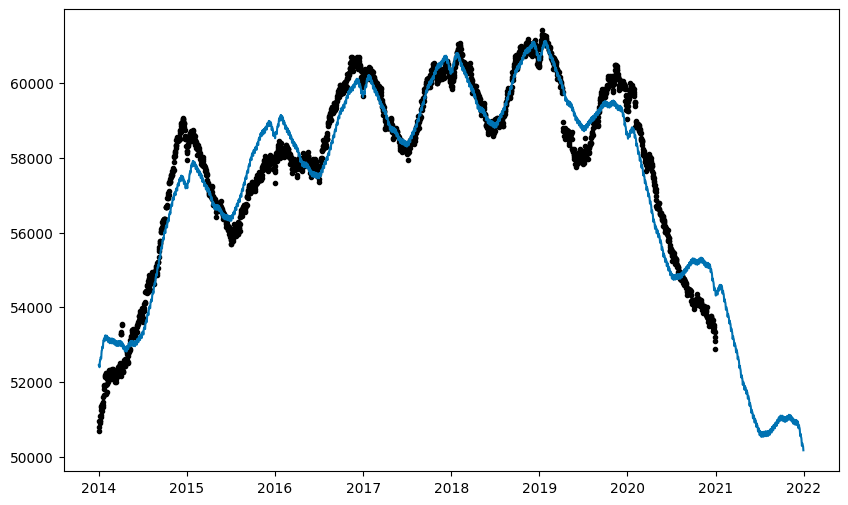

In [15]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
